In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import dicomsdl as dicom
import PIL
import cv2

In [7]:
train = pd.read_pickle('train_metadata.pkl')
train.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/462822612.dcm
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1459541791.dcm
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1864590858.dcm
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,train_images/10006/1874946579.dcm
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,train_images/10011/220375232.dcm


In [8]:
RESIZE_TO = (256, 256)

def dicom_file_to_ary(path):
    image = dicom.open(path)
    data = image.pixelData()
       
    data = (data - data.min()) / (data.max() - data.min())
    
    if image.PhotometricInterpretation == "MONOCHROME1":
        data = 1 - data
        
    data = cv2.resize(data, RESIZE_TO)
    data = (data * 255).astype(np.uint8)
    return data

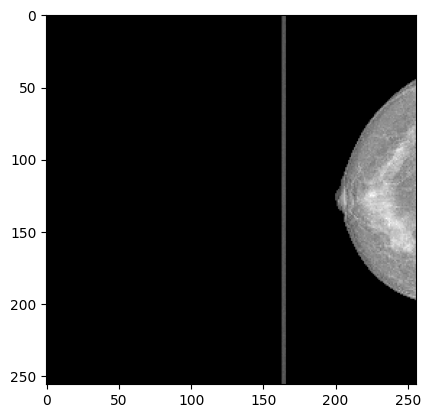

In [9]:
plt.imshow(dicom_file_to_ary(train.image_path.iloc[3]), cmap='gray')

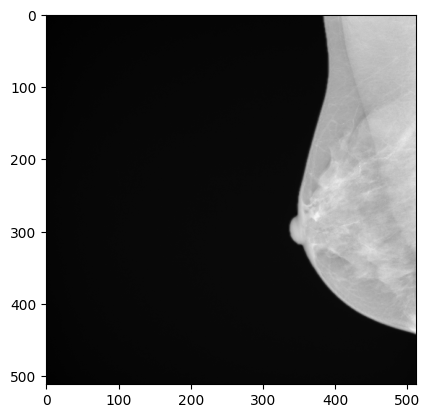

In [10]:
test_image = dicom.open(train['image_path'].iloc[12])

test_image = cv2.flip(cv2.resize(test_image.pixelData(), (512, 512)), 1)
plt.imshow(test_image, cmap='gray')

In [11]:
train['img_array'] = np.array

for row in tqdm(range(len(train))):
    
    img = dicom_file_to_ary(train['image_path'].iloc[row])

    if train['laterality'].iloc[row] == 'R':
        train['img_array'].iloc[row] = cv2.flip(img, 1)
    else:
        train['img_array'].iloc[row] = img

  0%|          | 0/54706 [00:00<?, ?it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_24476\3920691881.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['img_array'].iloc[row] = img
  0%|          | 2/54706 [00:01<11:23:28,  1.33it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_24476\3920691881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['img_array'].iloc[row] = cv2.flip(img, 1)
100%|██████████| 54706/54706 [6:09:46<00:00,  2.47it/s]   


In [12]:
train.to_pickle('processed_img.pkl')